# DDIM Inversion

## Setup

In [2]:
!pip install -q transfomers diffusers accelerate matplotlib

ERROR: Could not find a version that satisfies the requirement transfomers (from versions: none)
ERROR: No matching distribution found for transfomers

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import requests
from PIL import Image
from io import BytesIO
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms as tfms
from diffusers import StableDiffusionPipeline, DDIMScheduler

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Loading an existing pipeline

In [9]:
# load pretrained checkpoint
pipe = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5').to(device)

# set up a DDIM scheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

# 

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

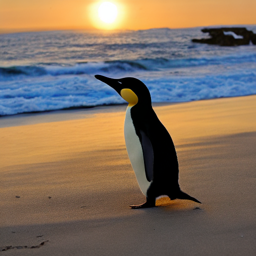

In [10]:
prompt = 'Beautiful DSLR Photograph of a pinguin on the beach, golden hour'
negative_prompt = 'blurry, ugly, stock photo'
im = pipe(prompt, negative_prompt=negative_prompt).images[0]
im.resize((256, 256))

## DDIM Sampling

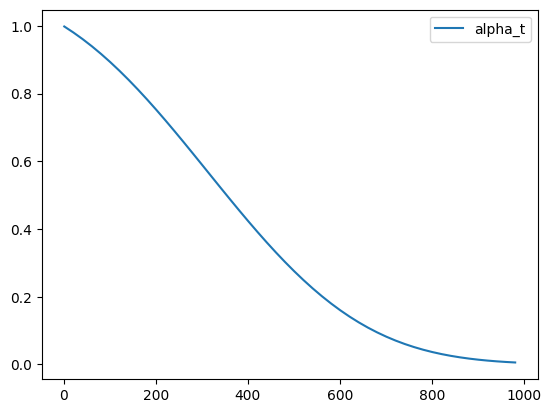

In [14]:
timesteps = pipe.scheduler.timesteps.cpu()
alphas = pipe.scheduler.alphas_cumprod[timesteps]
plt.plot(timesteps, alphas, label='alpha_t')
plt.legend()
plt.show()

In [24]:
prompt = 'watercolor painting of a beach sunset'
num_images_per_prompt = 1
do_classifier_free_guidance = True
negative_prompt = ''

num_inference_steps = 30

# text encoder
text_embeddings = pipe._encode_prompt(
    prompt,
    device,
    num_images_per_prompt,
    do_classifier_free_guidance,
    negative_prompt
)

# set up inference steps
pipe.scheduler.set_timesteps(num_inference_steps, device)

In [26]:
len(pipe.scheduler.timesteps)

30